In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_REESTCOGN', 'CSI_RESPROBL', 'ANSIEDADRASGO', 'CAPE_NEG_MALESTAR', 'CSL90_HOSTIL', 'SCL90_PSICOT', 'CSI_AUTOCRIT', 'CSL90_SENS_INT', 'CSI_RETISOC', 'SCL90_ANSIE', 'SCL90_ANS_FOB', 'TRAUMA_FRECUENCIA', 'CSI_APOYOSOC', 'CSI_PENSDESID', 'SCL90_SOMAT', 'CSI_EVITPROBL', 'CAPE_NEG_FREC', 'ESTRES_PERCIBIDO', 'SCL90_IDEA_PARAN', 'TRAUMA_AFECTACION', 'CSI_EXPEMOC', 'CAPE_DEPRE_MALESTAR', 'CAPE_POSIT_FREC', 'CAPE_POS_MALESTAR', 'SCL90_DEPRE', 'SCL90_OBS_COMP', 'CAPE_DEPRE_FREC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 0.142115  0.882354 -0.793319 -0.572222 ... -0.673104 -0.85539  -1.192631 -1.019342]
 [ 0.142115 -0.323969 -0.793319  1.061226 ...  3.293755  2.094434  2.016681  0.577926]
 [ 0.142115  1.284461 -1.117151 -0.753716 ... -0.219749 -1.01484  -1.192631 -0.791161]
 [-0.409484  0.480246 -0.145654  0.063008 ... -0.333087 -0.37704  -0.015883 -0.56298 ]
 [-0.409484  0.078139 -0.631403 -0.93521  ... -0.559765 -0.69594  -0.336814 -1.019342]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.095679,1.093069,0.561404,02:54
1,0.928163,1.020444,0.649123,02:29
2,0.832807,0.951535,0.649123,02:38
3,0.757413,0.901754,0.719298,02:38
4,0.705543,0.857864,0.701754,02:38


CSI_REESTCOGN,CSI_RESPROBL,ANSIEDADRASGO,CAPE_NEG_MALESTAR,CSL90_HOSTIL,SCL90_PSICOT,CSI_AUTOCRIT,CSL90_SENS_INT,CSI_RETISOC,SCL90_ANSIE,SCL90_ANS_FOB,TRAUMA_FRECUENCIA,CSI_APOYOSOC,CSI_PENSDESID,SCL90_SOMAT,CSI_EVITPROBL,CAPE_NEG_FREC,ESTRES_PERCIBIDO,SCL90_IDEA_PARAN,TRAUMA_AFECTACION,CSI_EXPEMOC,CAPE_DEPRE_MALESTAR,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,SCL90_DEPRE,SCL90_OBS_COMP,CAPE_DEPRE_FREC,target,prediction
-0.2256,-0.3240,-0.1457,0.9705,0.4484,0.6097,0.6547,1.0002,-0.1961,-0.1922,-0.6993,0.2933,-1.0794,-0.7051,-0.8431,-0.3282,0.3031,0.8675,1.0269,0.8081,-1.7118,0.8637,0.6420,1.3670,-0.0581,0.1981,0.3497,1,1
-0.5934,-0.9271,-0.1457,0.6075,0.0241,0.0853,-0.9016,-0.2053,-1.0393,-0.6718,-0.6993,0.1049,-0.9116,-1.2034,-0.1643,-0.7626,0.3031,-0.0746,-0.3213,-0.3432,-0.5794,-0.6440,-0.3147,-0.5598,-0.3770,-0.1229,-0.5630,0,0
0.1421,-0.5250,-4.0316,-1.4797,-0.8246,-0.8324,0.8276,-1.0089,0.6471,-0.9116,-0.6993,-1.2139,0.0953,-0.3729,-1.0370,0.7578,-1.4286,0.9852,-0.8991,-1.4518,0.1755,-1.3293,-1.1120,-1.0131,-1.0148,-1.1926,-1.2475,1,0
-0.7772,-0.5250,-0.1457,1.1520,-0.6124,-0.7013,0.3089,-0.6071,0.0147,-0.6718,-0.5171,0.0107,-0.2404,-0.2067,-0.5522,-0.1110,0.8359,-0.0746,-0.7065,-0.4285,0.1755,0.8637,-0.7931,-0.6731,-0.3770,0.3050,0.5779,0,0
-1.3288,0.0781,0.6639,0.6075,1.2971,0.7408,0.1359,0.3305,0.2255,1.3666,0.3938,-0.6487,-0.4082,1.2883,1.0963,-1.1969,0.7027,1.5740,0.8343,-0.7696,1.3079,1.1378,0.4825,0.8003,2.2539,1.5888,0.8061,1,1


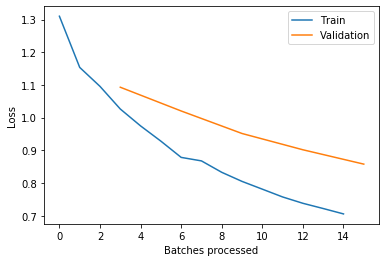

In [10]:
learn.recorder.plot_losses()
learn.show_results()